In [1]:
import numpy as np
import csv

In [2]:
filename = 'ionosphere.data'
X = np.zeros((351,34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [3]:
with open(filename, 'r') as file:
    reader = csv.reader(file)
    
    for i, row in enumerate(reader):
        data = [float(data) for data in row[:-1]]
        X[i] = data
        
        y[i] = row[-1] == 'g'

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("Accuracy is %.46f"%(accuracy))

Accuracy is 83.9622641509433975670617655850946903228759765625


In [16]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator, X_train, y_train, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print('The average accuracy of all folds is %.2f'%(average_accuracy))

The average accuracy of all folds is 82.45


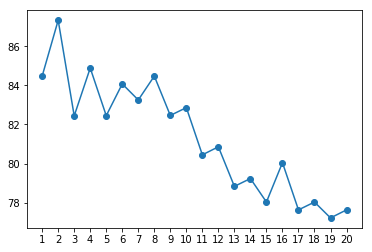

In [27]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))
for n_neigbhours in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors = n_neigbhours)
    scores = cross_val_score(estimator, X_train, y_train, scoring = 'accuracy')
    avg_scores.append(np.mean(scores) * 100)
    all_scores.append(scores)

plt.plot(parameter_values, avg_scores, 'o-')
plt.xticks(parameter_values)
plt.show()